# Exercícios 1 e 3 (tarefa para retorno 1)

### Ex. 1: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.


**Explicação:** aqui iremos verificar se a sobrevivência tem relação direta com o sexo do passageiro, ou seja, a taxa de mulheres sobreviventes foi maior do que a de homens? 

É importante ter sempre em mente a hipótese que queremos testar, nesse caso pode ser por exemplo: 

    - h0 = a taxa de sobrevivência tem relação direta com o sexo do passageiro. (Hipótese nula)
    - h1 = a taxa de sobrevivência não tem relação direta com o sexo do passageiro. (Hipótese alternativa)

Aqui estamos estudando duas variáveis categóricas: survived = 0 ou 1 e sex = male ou female, por isso podemos usar o chi-quadrado.

O chi-quadrado tem como princípio básico comparar proporções, ou seja, possíveis divergências entre as frequências observadas e esperadas para um certo evento.


**Etapas básicas:**

- Carregar os dados titanic.csv;
- Analisar a tabela;
- Estudar a relação entre as variáveis survived e sex;
    - Criar diferentes gráficos
    - Calcular chi-quadrado
    

Obs.: Todos os códigos são correspondentes aos códigos vistos em aula!

#### a) Carregar bibliotecas e os dados

In [208]:
# Bibliotecas essenciais

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [209]:
df = pd.read_csv("../../Aulas/Modulo6/titanic.csv")

print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No conjunto de dados titanic temos 891 linhas (observações) e 12 colunas (características)

#### b) Calcular a probabilidade de sobreviver sendo homem e sendo mulher

In [210]:
# Codigo explicado:
# df[(df.Survived==1) & ( df.Sex=='male')].shape[0] => quantidade de homens que sobreviveram
# df[df.Sex=='male'].shape[0] => quantidade total de homens
# round(prob_h,2) => arredonda o numero assumindo 2 casas decimais 
# *100 => multiplica o valor decimal por 100 para obter em porcentagem

prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", (round(prob_homem,2)*100)) 
print("Probabilidade de sobreviver sendo mulher:", (round(prob_mulher,2)*100))

Probabilidade de sobreviver sendo homem: 19.0
Probabilidade de sobreviver sendo mulher: 74.0


In [211]:
#Agrupando os dados de sobreviventes e sexo pelo local de embarque

#HOMEM
df_qtd_sob_por_local_homem = df[(df.Survived==1) & (df.Sex=='male') & (df.Embarked)] #quantidade de homens que sobreviveram e seu local de embarque
df_qtd_sob_por_local_homem[['Survived', 'Sex', 'Embarked']].sort_values(by=['Embarked'], ascending=True)

df_embarked_male = df_qtd_sob_por_local_homem.groupby('Embarked').apply(lambda x: x.Sex.value_counts()).unstack()
#df_embarked_male_pct = df_qtd_sob_por_local_homem.groupby('Embarked').apply(lambda x: x.Sex.value_counts()/x.shape[0]).unstack()
print(df_embarked_male)

Sex   Embarked
male  C           29
      Q            3
      S           77
dtype: int64


In [212]:
#Agrupando os dados de sobreviventes e sexo pelo local de embarque

#MULHER
df_qtd_sob_por_local_mulher = df[(df.Survived==1) & (df.Sex=='female') & (df.Embarked)] #quantidade de homens que sobreviveram e seu local de embarque
df_qtd_sob_por_local_mulher[['Survived', 'Sex', 'Embarked']].sort_values(by=['Embarked'], ascending=True)

df_embarked_female = df_qtd_sob_por_local_mulher.groupby('Embarked').apply(lambda x: x.Sex.value_counts()).unstack()
#df_embarked_female_pct = df_qtd_sob_por_local_mulher.groupby('Embarked').apply(lambda x: x.Sex.value_counts()/x.shape[0]).unstack()
print(df_embarked_female)

Sex     Embarked
female  C            64
        Q            27
        S           140
dtype: int64


------

**Qual sua conclusão a partir dos dados acima?**

R: O olhar apenas para as variáveis de sobreviventes e sexo, logo de cara não foi convincente para mim. Por isso, levantei o número de sobrevivênte por área de embarque.

**Você vê algum indicativo de relação entre ter sobrevivido e o sexo?**

R: Entre sobrevivente e sexo não!. Mas, adicionando a variável de local de embarque, podemos ver que quem embarcou na área S, teve um maior número de sobreviventes em relação 'a quem embarcou nas outras áreas, isso para ambos sexos. E também, vemos que, por embarcar mais mulheres na área S, por isso, teve um maior número de sobrevivêntes mulheres.

⚠Claro que isso, olhando apenas os números, sabemos que em momento de emergência também há priorização de salavamento para mulheres e crianças, entre outros fatores de gestão militar e humano.

------

In [213]:
# Usando o código abaixo você consegue obter a quantidade de mulheres e homens que sobreviveram (1) e morreram (0)
# Gera tabela de frequencia absoluta!

df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

,0,1
Sex,,
female,81,233
male,468,109


In [214]:
# Com uma simples modificação no código acima você passa a ter os valores em percentual
# Gera tabela de frequencia relativa!

df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


#### c) Construção de gráfico

Estude o código abaixo!

Todo o código foi demonstrado durante a aula!

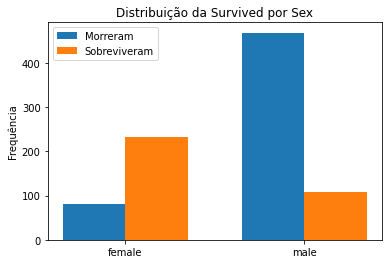

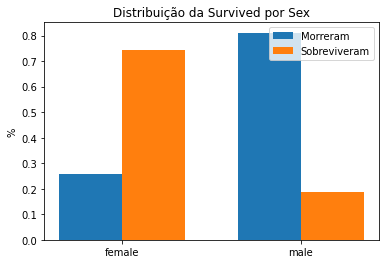

In [215]:
# Codigo apresentado em aula!

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

labels = list(df_sex.index) #labels do gráfico de barras

morreram = df_sex[0].values #valores para construção do grafico de barras
sobreviveram = df_sex[1].values #valores para construção do grafico de barras

morreram_prob = df_sex_prob[0].values #valores para construção do grafico de barras
sobreviveram_prob= df_sex_prob[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Survived por Sex') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_prob, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_prob, width, label='Sobreviveram')

ax1.set_ylabel('%')
ax1.set_title('Distribuição da Survived por Sex')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

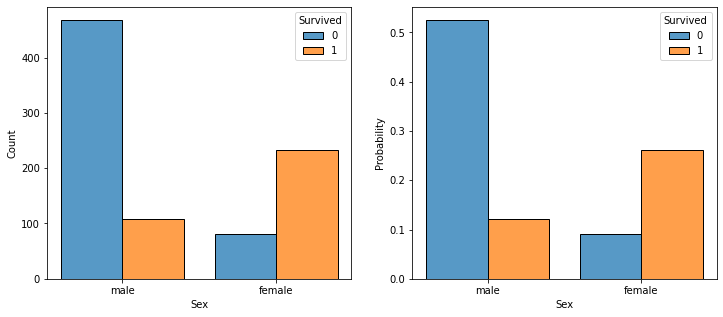

In [216]:
# Maneira alternativa usando a biblioteca seaborn - NOVO!

import seaborn as sns

#seaborn é uma biblioteca muito útil para o dia a dia do cientista de dados.
# ele possui diferentes tipos de gráficos para visualização estatística.

# ref.: https://seaborn.pydata.org/

fig, axs = plt.subplots(1,2, figsize=[12,5])

sns.histplot(df, x='Sex', hue='Survived', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

#stat='count' : conta a quantidade de cada sexo de acordo com a sobrevivencia

sns.histplot(df, x='Sex', hue='Survived', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

#stat='probability' : calcula a probabilidade de cada sexo de acordo com a sobrevivencia

------

**Qual conclusão você reforça com esses gráficos?**

R: A forma visual ainda sim, reforça que somente o sexo em sí, não define se irá sobreviver ou não, mas juntamente com as outras variáveis mencionadas anteriormente sim, é poss´veil chegar a conclusão que é mais provavel que em casos de emergencia e a localidade possa ajudar no fator do sexo feminino sobreviver.

------

#### d) Calcular o chi-quadrado

1) obter a distribuicao geral da variavel Survived;

2) obter a tabela de frequencia para os dados observados:

    - tabela de frequencia absoluta;
    - tabela de frequencia relativa.

3) adicionar o total na tabela de frequencia absoluta;

4) obter a tabela de frequência esperada:

    - caso as duas variáveis não tivesse relação.
    
5) cálculo do chi-quadrado:

Observado menos o esperado - desvio: $o_i - e_i$
    
Desvio ao quadrado: $\sigma^2 = (o_i - e_i)^2$

Chi-quadrado: $X^2 = (o_i - e_i)^2 / e_i$
   

In [217]:
# 1) Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [218]:
# 2) Tabelas de frequencia absoluta e relativa:

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_prob

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [219]:
# 3) Adicionar o total para cada sexo na tabela de frequência absoluta:

df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [220]:
# 4) Tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [221]:
# 5) Cálculo do chi-quadrado

# calculo dos desvios:

desvios = (df_sex.iloc[:,:2].values - df_esp.values)

print(desvios)

# calculo dos desvios ao quadrado:

desvios_ao_quadrado = desvios**2

# calculo do chi-quadrado:

chi_quad = sum(sum(desvios_ao_quadrado/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad)


[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303


------

**O que significa o valor do chi-quadrado de Pearson?**

R: Resumidamente o chi-quadrado, é uma forma de tirar a diferença entre o real e o esperado e traduzindo em forma numérica.

**Quais foram as suas conclusões?**

R: Olhando somente para a relação entre o volume do esperado e o real, aparentemente o real foi bem acima, tendo assim uma tendência a ter relação. Mas ao olhar para o chi-quadrado de person, mudei o pensamento, já que praticamente o espero e o real zeram, mostrando que não há uma relação entre sobreviventes e sexo.

------

### Ex3: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:

**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [222]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [223]:
df.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Hora Abertura              object
Data Resposta              object
Hora Resposta              object
Data Análise               object
Hora Análise               object
Data Recusa                object
Hora Recusa                object
Data Finalização           object
Hora Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empre

### 1 - Qual o número de reclamações por Estado?

    - Calcular a quantidade de reclamações de acordo com os estados.


In [253]:
total_reclamacao_por_estado = df.groupby(['UF'])['Avaliação Reclamação'].count().reset_index(name='Reclamações por Estado')
total_reclamacao_por_estado

,UF,Reclamações por Estado
0,AC,441
1,AL,99
2,AM,279
3,AP,16
4,BA,2320
5,CE,1032
6,DF,1749
7,ES,1054
8,GO,826
9,MA,1047


<AxesSubplot:xlabel='UF'>

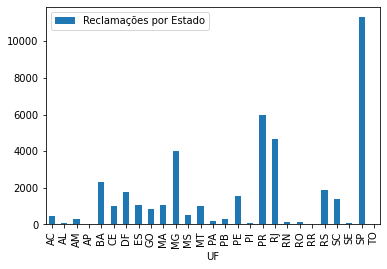

In [254]:
total_reclamacao_por_estado.plot(x="UF", y=["Reclamações por Estado"], kind="bar")

### 2 - Qual a quantidade de reclamações por sexo?

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.


In [255]:
total_reclamacao_por_sexo = df.groupby(['Sexo'])['Avaliação Reclamação'].count().reset_index(name='Reclamações por Sexo')
total_reclamacao_por_sexo

,Sexo,Reclamações por Sexo
0,F,15374
1,M,26779


<AxesSubplot:xlabel='Sexo'>

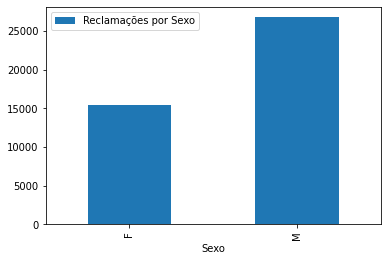

In [256]:
total_reclamacao_por_sexo.plot(x="Sexo", y=["Reclamações por Sexo"], kind="bar")

### 3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)


In [257]:
relacao_tempo_e_nota = df.groupby(['Nota do Consumidor'])['Tempo Resposta'].count().reset_index(name='Tempo de Resposta em Dias')
relacao_tempo_e_nota

,Nota do Consumidor,Tempo de Resposta em Dias
0,1.0,9825
1,2.0,1874
2,3.0,3738
3,4.0,4303
4,5.0,8772


<AxesSubplot:xlabel='Nota do Consumidor'>

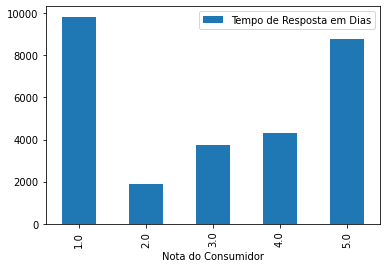

In [258]:
relacao_tempo_e_nota.plot(x="Nota do Consumidor", y=["Tempo de Resposta em Dias"], kind="bar")

In [259]:
corr_df = relacao_tempo_e_nota.corr()
print("A correlação é:")
print(corr_df, "\n")

A correlação é:
                           Nota do Consumidor  Tempo de Resposta em Dias
Nota do Consumidor                   1.000000                   0.014916
Tempo de Resposta em Dias            0.014916                   1.000000 



### 4 - Proporção de reclamações registradas e não respondidas.

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

In [231]:
total_reclamacao_por_estado = df.groupby(['Respondida'])['Avaliação Reclamação'].count().reset_index(name='Total Reclamações')
total_reclamacao_por_estado['Porc. %'] = (total_reclamacao_por_estado['Total Reclamações'] / total_reclamacao_por_estado['Total Reclamações'].sum()) * 100
total_reclamacao_por_estado

,Respondida,Total Reclamações,Porc. %
0,N,215,0.510047
1,S,41938,99.489953


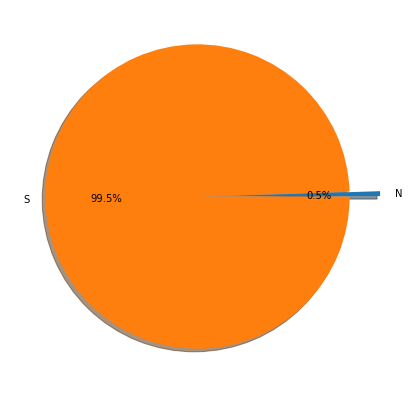

In [232]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(total_reclamacao_por_estado["Porc. %"], labels = total_reclamacao_por_estado["Respondida"], autopct='%1.1f%%', shadow=True, explode=(0.2, 0))
plt.show() 

### 5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 

    - Proponha outras hipóteses e verifique-as (no mínimo duas).

### 5.1 Qualidade: Identificar e ordenar os segmento com maiores problema, por área.

In [233]:
df_qualidade_segmento_por_area = df[['Área', 'Segmento de Mercado']]
df_qualidade_segmento_por_area = df_qualidade_segmento_por_area.groupby(['Área'])['Segmento de Mercado'].count().reset_index(name='Quantidade Segmento')
df_qualidade_segmento_por_area = df_qualidade_segmento_por_area.sort_values(['Quantidade Segmento'], ascending=False)

df_qualidade = df[['Área', 'Segmento de Mercado']]
df_qualidade = df_qualidade.groupby('Área')['Segmento de Mercado'].apply(list).reset_index(name='Segmento de Mercado')

df_qualidade_segmento_por_area['Segmento de Mercado'] = df_qualidade['Segmento de Mercado']

df_qualidade_segmento_por_area

,Área,Quantidade Segmento,Segmento de Mercado
9,Telecomunicações,19965,"[Operadoras de Telecomunicações (Telefonia, In..."
8,Serviços Financeiros,9364,"[Bancos, Financeiras e Administradoras de Cart..."
6,Produtos de Telefonia e Informática,7047,"[Comércio Eletrônico, Fabricantes - Eletroelet..."
5,Produtos Eletrodomésticos e Eletrônicos,3656,"[Fabricantes - Linha Branca, Comércio Eletrôni..."
1,Demais Produtos,2312,"[Comércio Eletrônico, Comércio Eletrônico, Var..."
10,Transportes,477,"[Agências de Viagens, Transporte Aéreo, Agênci..."
2,Demais Serviços,402,"[Varejo, Bancos, Financeiras e Administradoras..."
7,Saúde,257,[Operadoras de Planos de Saúde e Administrador...
11,Turismo/Viagens,243,"[Agências de Viagens, Agências de Viagens, Agê..."
0,Alimentos,116,"[Varejo, Supermercados, Supermercados, Superme..."


<AxesSubplot:xlabel='Área'>

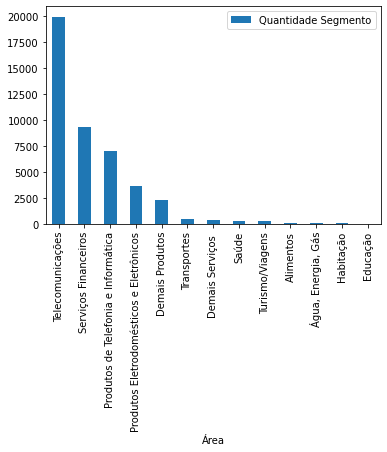

In [234]:
df_qualidade_segmento_por_area.plot(x="Área", y=["Quantidade Segmento"], kind="bar")

### 5.2 Presença Digital: Qual a porcentagem das reclamações realizadas pelo canal digital.

In [235]:
df_reclamacoes_digitais_por_faixa_etaria  = df[['Canal de Origem', 'Faixa Etária']]
df_reclamacoes_digitais_por_faixa_etaria = df_reclamacoes_digitais_por_faixa_etaria.groupby(['Canal de Origem'])['Faixa Etária'].count().reset_index(name='Quant. de Reclamações')
df_reclamacoes_digitais_por_faixa_etaria = df_reclamacoes_digitais_por_faixa_etaria.sort_values(['Quant. de Reclamações'], ascending=False)

df_canal_de_origem = df[['Canal de Origem', 'Faixa Etária']]
df_canal_de_origem = df_canal_de_origem.groupby('Canal de Origem')['Faixa Etária'].apply(list).reset_index(name='Faixa Etária')

df_reclamacoes_digitais_por_faixa_etaria['% Reclamações'] = (df_reclamacoes_digitais_por_faixa_etaria['Quant. de Reclamações'] / df_reclamacoes_digitais_por_faixa_etaria['Quant. de Reclamações'].sum()) * 100

df_reclamacoes_digitais_por_faixa_etaria

,Canal de Origem,Quant. de Reclamações,% Reclamações
1,Plataforma Web,22156,50.369427
0,Não identificado,21831,49.630573


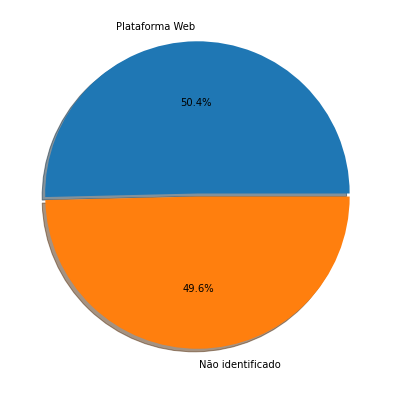

In [236]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df_reclamacoes_digitais_por_faixa_etaria["% Reclamações"], labels = df_reclamacoes_digitais_por_faixa_etaria["Canal de Origem"], autopct='%1.1f%%', shadow=True, explode=(0.02, 0))
plt.show() 